##### Instructions
1. Try to convey what you've learned about the project in what would take 5-10 minutes to read/watch. If it's software that can run in a notebook, you can include runnable examples. Images and plots are highly encouraged.
2. Share at least one question you have about the software.
3. Propose at least one experiment that would be interesting for a group project. Describe what the experiment would measure and how it would be presented (e.g., what the axes would be on a figure).
4. Commit and push to your repository.

I thought it would be interesting to see how using the software provided by SciPy can speed up calculations - if there is a real difference in runtime or not. The example below shows SVD without using the svd function.

In [38]:
import numpy as np
# Test matrix
A = np.array([[1, 2], [3, 4], [5, 6]])

# Compute the SVD using eigendecomposition
ATA = A.T @ A
eigenvalues, eigenvectors = np.linalg.eig(ATA)

# Sort the eigenvectors and eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:,sort_indices]

# Compute singular values, U, and V
singular_values = np.sqrt(eigenvalues)
V = eigenvectors
U = A @ V / singular_values

print("U:\n", U)
print("s:\n", singular_values)
print("V:\n", V)

U:
 [[-0.2298477   0.88346102]
 [-0.52474482  0.24078249]
 [-0.81964194 -0.40189603]]
s:
 [9.52551809 0.51430058]
V:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


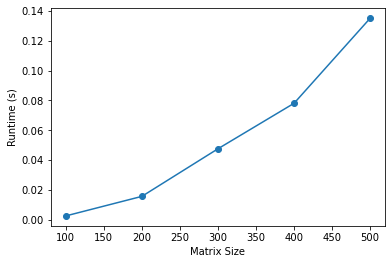

In [39]:
import time
import matplotlib.pyplot as plt

# Test Range (KEEP CONSISTENT)
sizes = [100, 200, 300, 400, 500]

runtimes = []

# Test each size
for size in sizes:

    A = np.random.rand(size, size)
    
    # Measure runtime
    start_time = time.time()
    
    #Same code as above...
    ATA = A.T @ A
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    
    sort_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sort_indices]
    eigenvectors = eigenvectors[:,sort_indices]
    
    singular_values = np.sqrt(eigenvalues)
    V = eigenvectors
    U = A @ V / singular_values
    
    # Store the runtime
    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)

# Plot
plt.plot(sizes, runtimes, '-o')
plt.xlabel('Matrix Size')
plt.ylabel('Runtime (s)')
plt.show()

The example below imports svd from our SciPy library and shows a considerably different runtime plot (the y-axis max is 0.035, although this can vary each time you run it).

In [34]:
from scipy.linalg import svd
A = np.array([[1, 2], [3, 4], [5,6]])
U, s, V = svd(A)
print("U:\n", U)
print("s:\n", s)
print("V:\n", V)

U:
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
s:
 [9.52551809 0.51430058]
V:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


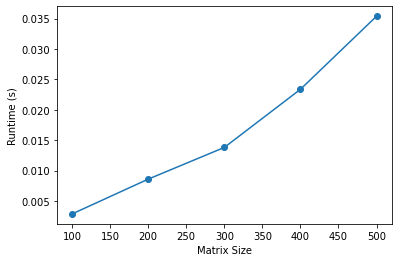

In [35]:
import matplotlib.pyplot as plt
import timeit

# Test Range
sizes = [100, 200, 300, 400, 500]

runtimes = []

for size in sizes:

    A = np.random.rand(size, size)
    
    # Measure the runtime of SVD method
    t = timeit.timeit(lambda: svd(A), number=1)
    
    # Store the runtime
    runtimes.append(t)

plt.plot(sizes, runtimes, '-o')
plt.xlabel('Matrix Size')
plt.ylabel('Runtime (s)')
plt.show()

So, for matrices holding a large amount of data, svd() can decrease the runtime of your project. Although, this may not be a noticeable difference for smaller matrices.

Is this the case for every function from SciPy library, with regards to decomposition? And what does svd do exactly that gives you your answer faster?

Hopefully, I can find someone in class who also wants to work with SciPy to look into this. Or maybe we can study different packages and recreate the same experiments to evaluate differences in each.